Dataset loaded from: processed_fraud_dataset.csv
Total records: 6362620

Class Distribution:
isFraud
0    6354407
1       8213
Name: count, dtype: int64

Class Percentage:
isFraud
0    99.8709
1     0.1291
Name: count, dtype: float64


C:\Users\chara\AppData\Local\Temp\ipykernel_12300\2290060522.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette=['skyblue', 'salmon'])


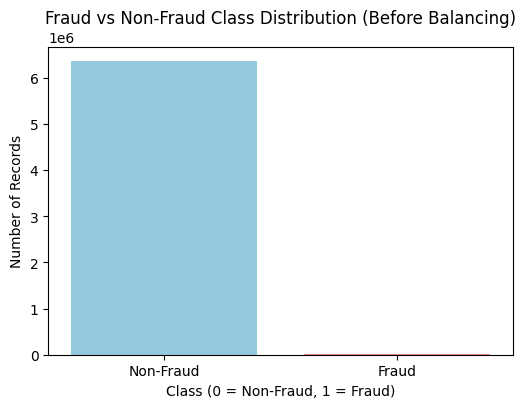

ValueError: could not convert string to float: 'PAYMENT'

In [3]:
# --- Import Libraries ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# --- Load Dataset (include your dataset path here) ---
dataset_path = "processed_fraud_dataset.csv"   # Change if your file is in a different folder
df = pd.read_csv(dataset_path)

# --- Check Class Distribution ---
class_counts = df["isFraud"].value_counts()
total = df.shape[0]

print(f"Dataset loaded from: {dataset_path}")
print(f"Total records: {total}\n")

print("Class Distribution:")
print(class_counts)

print("\nClass Percentage:")
print(round((class_counts / total) * 100, 4))

# --- Visualize Class Balance ---
plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette=['skyblue', 'salmon'])
plt.title("Fraud vs Non-Fraud Class Distribution (Before Balancing)")
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Number of Records")
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()

# --- Balance Dataset Using SMOTE ---
X = df.drop("isFraud", axis=1)
y = df["isFraud"]

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("\nDataset Balanced Using SMOTE")
print("Before SMOTE:", y.value_counts().to_dict())
print("After SMOTE:", y_resampled.value_counts().to_dict())

# --- Visualize Balanced Distribution ---
plt.figure(figsize=(6,4))
sns.barplot(x=y_resampled.value_counts().index, 
            y=y_resampled.value_counts().values, 
            palette=['skyblue', 'salmon'])
plt.title("Balanced Fraud vs Non-Fraud Distribution (After SMOTE)")
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Number of Records")
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()


In [1]:
import pandas as pd

# Load your dataset
df = pd.read_csv("balanced_preprocessed_dataset.csv")

# Check the target distribution
target_counts = df["isFraud"].value_counts()
print("Target class distribution:\n", target_counts)

# Check if dataset is balanced
if abs(target_counts[0] - target_counts[1]) / target_counts.sum() < 0.1:
    print("✅ Dataset is roughly balanced")
else:
    print("⚠ Dataset is imbalanced")


Target class distribution:
 isFraud
0    4448085
1    4448085
Name: count, dtype: int64
✅ Dataset is roughly balanced
